# This data will help people on a diet choose the right drink at Starbucks 
### Business Understanding
Maintaining health of our body is our duty, in order to maintain our body to stay healthy we need to exercise and eat food and drink beverage with balanced nutrition. 
Nowadays, a lot of people are starting to have a healthy diet to keep their body healthy and in shape. But, at the other side a lot of fast-serve restaurant provide a lot of menu that has delicious food and tasty beverage.
On the other side, especially in my region, a lot of casual meetings are held outside office, usually people met at Starbucks to discuss or doing casual talk.
Some people who go on a diet tend to choose specific restaurants that can help them to stick to their diet.
So the main question is can we still go to Starbucks and enjoy their food without ignoring our diet pattern?
Here are 3 additional questions provided with its answes related to main question

What is the suggested daily intake for us who are on a diet?
What is the nutritional content of each Starbucks menu?
Starbucks well known of its coffee, and people tend to consume coffee to get enough caffeine to boost their energy level, but, how's caffeine correlate with calories?
How each nutritional content correlate with each other?

### Import Library

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Another Library

In [231]:
# install the chardet library
!pip install chardet
# import the chardet library
import chardet 

### Check Encode

In [232]:
food_input_file = "dataset/starbucks_food_menu.csv"
drink_input_file = "dataset/starbucks_drinks_menu_extended.csv"

In [233]:
with open(food_input_file, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [234]:
df_food = pd.read_csv(food_input_file, encoding='utf-16')

In [235]:
df_food.columns = ['food', 'calories', 'fat_g', 'carbo_g', 'fiber_g', 'protein_g'] 

In [236]:
print(df_food.shape)
df_food.head()

(113, 6)


,food,calories,fat_g,carbo_g,fiber_g,protein_g
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [237]:
with open(drink_input_file, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [238]:
df_drink = pd.read_csv(drink_input_file, encoding='utf-8')

In [239]:
df_drink.columns = ['beverage_category', 'beverage', 'beverage_prep', 'calories', 
                             'total_fat_g', 'trans_fat_g', 'saturrated_g', 'sodium_mg',
                             'carbo_g', 'cholesterol', 'fibre_g', 'sugars_g', 'protein_g',
                             'vit_a', 'vit_c', 'calcium', 'iron', 'caffeine_mg'] 

In [240]:
print(df_drink.shape)
df_drink.head()

(242, 18)


,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturrated_g,sodium_mg,carbo_g,cholesterol,fibre_g,sugars_g,protein_g,vit_a,vit_c,calcium,iron,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


## Data Understanding

We are using data from Starbucks, their food and beverage menu included with the nutritional content.
There are 113 data points for food menu and 242 data points for beverage menu.

The data is contained in 2 files:

starbucks_food_menu.csv - containing food name and nutritional content about each food (calories, carbohydrate, etc.)
starbucks_drinks_menu_extended.csv - containing beverage name and nutritional content about each beverage (calories, carbohydrate, etc.)

Here is the schema and explanation of each variable in the files:

starbucks_food_menu.csv
- food - food name	
- calories - total calories as an intake
- fat_g - fat in gram	
- carbo_g (int) - carbohydrate in gram
- fiber_g (int) - fyber in gram
- protein_g (int) - protein in gram
    
starbucks_drinks_menu_extended.csv
- beverage_category (string) - category of the beverage
- beverage (string) - name of the beverage
- beverage_prep (string) - size of the beverage
- calories (int) - total calories as an intake
- total_fat_g (int) - total fat in gram
- trans_fat_g (int) - total trans fat in gram
- saturrated_g (int) - saturrated fat in gram
- saturrated_g (int) - sodium in milligram
- carbo_g (int) - carbohydrate in gram
- cholesterol (int) - total cholesterol
- fibre (int) - total cholesterol
- sugar_g (int) - total sugar in gram
- protein_g (int) - total protein in gram
- vit_a (int) - % of daily need of Vit A
- vit_c (int) - % of daily need of Vit C
- calcium (int) - total calcium
- iron (int) - total protein in gram
- caffeine_mg (int) - total caffeine in milligram




### Check total item for each food and drink menu

In [241]:
df_drink.nunique()

beverage_category     9
beverage             33
beverage_prep        13
calories             48
total_fat_g          24
trans_fat_g          18
saturrated_g          4
sodium_mg             9
carbo_g              51
cholesterol          75
fibre_g               8
sugars_g             70
protein_g            26
vit_a                11
vit_c                10
calcium              14
iron                 18
caffeine_mg          36
dtype: int64

In [242]:
df_food.nunique()

food         113
calories      44
fat_g         35
carbo_g       49
fiber_g       13
protein_g     29
dtype: int64

### Check data type

In [243]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   food       113 non-null    object 
 1   calories   113 non-null    int64  
 2   fat_g      113 non-null    float64
 3   carbo_g    113 non-null    int64  
 4   fiber_g    113 non-null    int64  
 5   protein_g  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [244]:
df_drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beverage_category  242 non-null    object 
 1   beverage           242 non-null    object 
 2   beverage_prep      242 non-null    object 
 3   calories           242 non-null    int64  
 4   total_fat_g        242 non-null    object 
 5   trans_fat_g        242 non-null    float64
 6   saturrated_g       242 non-null    float64
 7   sodium_mg          242 non-null    int64  
 8   carbo_g            242 non-null    int64  
 9   cholesterol        242 non-null    int64  
 10  fibre_g            242 non-null    int64  
 11  sugars_g           242 non-null    int64  
 12  protein_g          242 non-null    float64
 13  vit_a              242 non-null    object 
 14  vit_c              242 non-null    object 
 15  calcium            242 non-null    object 
 16  iron               242 non

### Check data null

In [290]:
df_food.isna().sum()

food         0
calories     0
fat_g        0
carbo_g      0
fiber_g      0
protein_g    0
dtype: int64

In [291]:
df_drink.isna().sum()

beverage_category    0
beverage             0
beverage_prep        0
calories             0
total_fat_g          0
trans_fat_g          0
saturrated_g         0
sodium_mg            0
carbo_g              0
cholesterol          0
fibre_g              0
sugars_g             0
protein_g            0
vit_a                0
vit_c                0
calcium              0
iron                 0
caffeine_mg          0
dtype: int64

In this analytical process the output is descriptive statistic, there are no null data found on a dataset and we don't need to do feature encoding due to we only aim to find the correlation between nutritional content

## Data Preprocessing
#### 1. Assigning total_grams_served to food
Due to total grams served affect satiety, we explore the data and want to know the correlation between calories and total grams served.

#### 2. Change caffeine_mg, iron, total_fat_g to integer
it read as object which is supposed to be integer or float

#### get total grams served

In [210]:
df_food['total_g'] = df_food['fat_g'] + df_food['carbo_g'] + df_food['fiber_g'] +  df_food['protein_g']

In [245]:
df_drink["total_fat_g"].unique()
# 3 2

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [247]:
df_drink["caffeine_mg"].unique()
# Varies, varies, nan

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [248]:
df_drink["total_fat_g"].replace({"3 2": 3.2}, inplace=True)
df_drink["caffeine_mg"].replace({"nan": 0, np.nan: 0, "Nan": 0, 'Varies': 0, 'varies': 0}, inplace=True)

#### change column type

In [249]:
df_drink = df_drink.astype({"caffeine_mg": int, 'total_fat_g': float})

In [250]:
df_drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beverage_category  242 non-null    object 
 1   beverage           242 non-null    object 
 2   beverage_prep      242 non-null    object 
 3   calories           242 non-null    int64  
 4   total_fat_g        242 non-null    float64
 5   trans_fat_g        242 non-null    float64
 6   saturrated_g       242 non-null    float64
 7   sodium_mg          242 non-null    int64  
 8   carbo_g            242 non-null    int64  
 9   cholesterol        242 non-null    int64  
 10  fibre_g            242 non-null    int64  
 11  sugars_g           242 non-null    int64  
 12  protein_g          242 non-null    float64
 13  vit_a              242 non-null    object 
 14  vit_c              242 non-null    object 
 15  calcium            242 non-null    object 
 16  iron               242 non

### Data Profiling
#### Top 10 beverage with the highest calory

In [284]:
def top_10(df, groupby_category, measured_values, sort_asc=True, top_n=0):
    """
    To obtain top 10 class based on value of measured value

    Parameters:
    df: merged messages and categories DataFrame
    groupby_category: path of database filename
    measured_values: 
    sort_asc: 

    Returns:
    None
    
    Output:
    Print out chart and value"""
    
    print(top_n)
    df.groupby(groupby_category).mean().reset_index().\
    sort_values(by=measured_values, ascending=sort_asc)[:top_n].plot.barh(
         x=groupby_category, 
         y=measured_values)

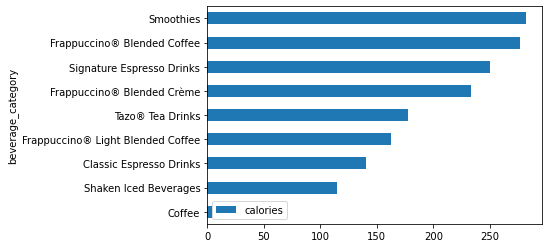

In [262]:
top_10(df_drink, 'beverage_category', 'calories')

#### Check more detail on Coffee's nutrition fact

In [263]:
df_coffee = df_drink[df_drink['beverage_category']=='Coffee']

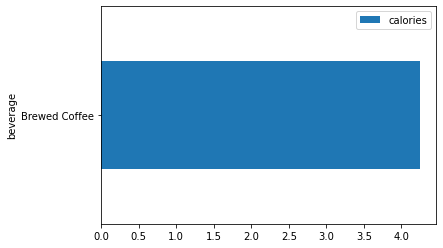

In [264]:
top_10(df_coffee, 'beverage', 'calories')

### Coffee's nutritional content

In [265]:
df_coffee.sort_values(by='calories', ascending=False)

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturrated_g,sodium_mg,carbo_g,cholesterol,fibre_g,sugars_g,protein_g,vit_a,vit_c,calcium,iron,caffeine_mg
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175


### Top 10 food with the highest & the lowest calory

#### the highest

10


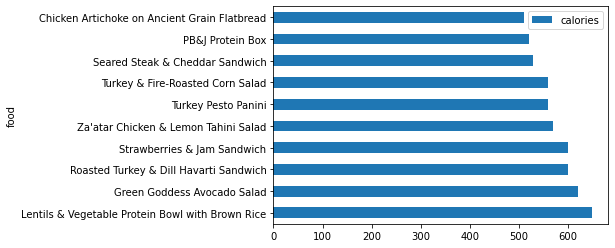

In [288]:
top_10(df_food, 'food', 'calories', sort_asc=False, top_n=10)

#### the lowest

10


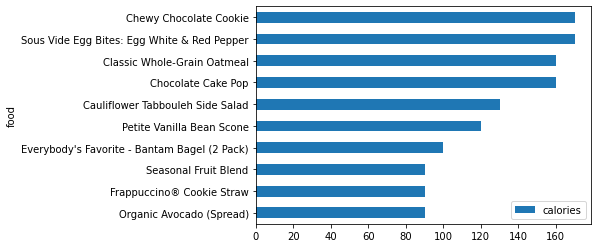

In [289]:
top_10(df_food, 'food', 'calories', sort_asc=True, top_n=10)

In [212]:
df_food.sort_values(by='calories', ascending=False)

,food,calories,fat_g,carbo_g,fiber_g,protein_g,total_g
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23,153.0
61,Green Goddess Avocado Salad,620,37.0,62,10,13,122.0
54,Strawberries & Jam Sandwich,600,25.0,80,10,19,134.0
65,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6,32,117.0
70,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27,128.0
105,Turkey Pesto Panini,560,23.0,55,3,34,115.0
69,Turkey & Fire-Roasted Corn Salad,560,29.0,53,7,24,113.0
66,Seared Steak & Cheddar Sandwich,530,29.0,44,2,23,98.0
75,PB&J Protein Box,520,26.0,53,5,20,104.0
97,Chicken Artichoke on Ancient Grain Flatbread,510,27.0,37,5,24,93.0


Food that has the most calory contain about 500 to 600 calories per served, all of shown above are still within range of balance nutrition and it won’t be a good idea if we consume it 3 times a day due to fat content

#### correlation between calories and total grams served

In [132]:
df_food[['calories', 'total_g']].corr().style.background_gradient(cmap='coolwarm')

,calories,total_g
calories,1.000000,0.960473
total_g,0.960473,1.000000


caffeine on a coffee has a strong correlation with calories

In [220]:
df_coffee

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturrated_g,sodium_mg,carbo_g,cholesterol,fibre_g,sugars_g,protein_g,vit_a,vit_c,calcium,iron,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410


#### correlation of each nutritional content


In [221]:
corr = df_drink[['calories','total_fat_g', 'trans_fat_g', 'saturrated_g', 'sodium_mg',
                 'carbo_g', 'cholesterol', 'fibre_g', 'sugars_g', 'protein_g',
                 'vit_a', 'vit_c', 'calcium', 'iron', 'caffeine_mg']].corr()
corr.style.background_gradient(cmap='coolwarm')

,calories,total_fat_g,trans_fat_g,saturrated_g,sodium_mg,carbo_g,cholesterol,fibre_g,sugars_g,protein_g,caffeine_mg
calories,1.000000,0.632785,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.050332
total_fat_g,0.632785,1.000000,0.890175,0.619264,0.587177,0.449546,0.372713,0.259380,0.330443,0.550480,0.169872
trans_fat_g,0.642818,0.890175,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.187604
saturrated_g,0.331047,0.619264,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.047141
sodium_mg,0.387892,0.587177,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.089527
carbo_g,0.795037,0.449546,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.186482
cholesterol,0.940034,0.372713,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,-0.022005
fibre_g,0.384292,0.259380,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,-0.131485
sugars_g,0.909675,0.330443,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,-0.016856
protein_g,0.578453,0.550480,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.100525


correlation of beverage’s nutritional content is various, different from correlation of food’s nutritional content, correlation between calories and cholesterol shows the strongest correlation, followed by sugars and carbohydrate

In [182]:
df_drink['total_fat_g'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [149]:
corr = df_drink[['calories','caffeine_mg']].corr()
corr.style.background_gradient(cmap='coolwarm')

,calories
calories,1.000000


In [135]:
corr = df_food[['fat_g', 'carbo_g', 'fiber_g', 'protein_g', 'calories']].corr()
corr.style.background_gradient(cmap='coolwarm')

,fat_g,carbo_g,fiber_g,protein_g,calories
fat_g,1.000000,0.281132,0.276059,0.423364,0.828929
carbo_g,0.281132,1.000000,0.407655,0.204375,0.708496
fiber_g,0.276059,0.407655,1.000000,0.472246,0.471079
protein_g,0.423364,0.204375,0.472246,1.000000,0.618962
calories,0.828929,0.708496,0.471079,0.618962,1.000000


All nutritional content of food menu has positive correlation to each other. Data showed that fat has the strongest correlation to calories followed by carbohydrates, protein and fiber

Conclusion
1. Food that listed as menu contain almost enough nutrition, though we still need to consume food as a source of carbohydrate, we can consume potato to obtain suggested amount of carbohydrates.
2. Calories has a strong correlation with total grams served thus it also affect satiety
3. Caffeine and calories has a strong correlation, beside we get energy intake from calories, caffeine from the coffee also help us to obtain more energy level and faster response time

In [96]:
# Source:
# The FDA recommend that people get 78 g of fat per day in a 2,000 calorie diet. 
# People should aim to get less than 10% of their daily calories from saturated fats.
# https://www.medicalnewstoday.com/articles/153998#fats

In [ ]:
# https://www.webmd.com/food-recipes/protein
# https://www.healthline.com/health/food-nutrition/how-much-fiber-per-day
# https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/nutrition-basics/whole-grains-refined-grains-and-dietary-fiber#.WVVm4RMrIdU
# https://www.whitneyerd.com/
# https://www.who.int/news-room/fact-sheets/detail/healthy-diet

In [222]:
# https://paulogentil.com/pdf/Volume%20of%20food%20consumed%20affects%20satiety%20in%20men.pdf

In [223]:
# https://www.healthline.com/nutrition/top-13-evidence-based-health-benefits-of-coffee#TOC_TITLE_HDR_2